In [1]:
import pandas as pd

from src.data.data_loader import load_data
from src.data.data_cleaner import clean_data

from src.data.data_transforms import (
    create_time_diff_cols,
    create_iob_and_ins_availability_cols,
    create_cob_and_carb_availability_cols,
)

In [2]:
def get_five_fifteen_minute_patients(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns a DataFrame containing only patients with a 5-minute time difference.
    """
    five_minute_patients = []
    fifteen_minute_patients = []
    grouped_patients = df.groupby("p_num")
    for patient_id, patient_df in grouped_patients:
        most_common_time_diff = patient_df["time_diff"].value_counts().index[0]
        if most_common_time_diff.components.minutes == 5:
            five_minute_patients.append((patient_id, patient_df))
        if most_common_time_diff.components.minutes == 15:
            fifteen_minute_patients.append((patient_id, patient_df))

    return five_minute_patients, fifteen_minute_patients

In [3]:
df = create_time_diff_cols(
    clean_data(load_data(data_source_name="kaggle_brisT1D", dataset_type="train"))
)

In [4]:
five_minute_patients, fifteen_minute_patients = get_five_fifteen_minute_patients(df)
example_patient_df = five_minute_patients[0][1]

In [5]:
example_patient_df = create_iob_and_ins_availability_cols(example_patient_df)
example_patient_df = create_cob_and_carb_availability_cols(example_patient_df)

In [6]:
example_patient_df.columns

Index(['id', 'p_num', 'time', 'bg-0:00', 'insulin-0:00', 'carbs-0:00',
       'hr-0:00', 'steps-0:00', 'cals-0:00', 'activity-0:00', 'time_diff',
       'insulin_availability', 'iob', 'cob', 'carb_availability'],
      dtype='object')

In [7]:
example_patient_df["iob"].head()

8459    0.000000
8460    0.050991
8461    0.107539
8462    0.165285
8463    0.221334
Name: iob, dtype: float64

In [8]:
example_patient_df["insulin_availability"].head()

8459    0.000000
8460    0.000090
8461    0.000506
8462    0.001345
8463    0.002607
Name: insulin_availability, dtype: float64

<Figure size 1200x600 with 0 Axes>

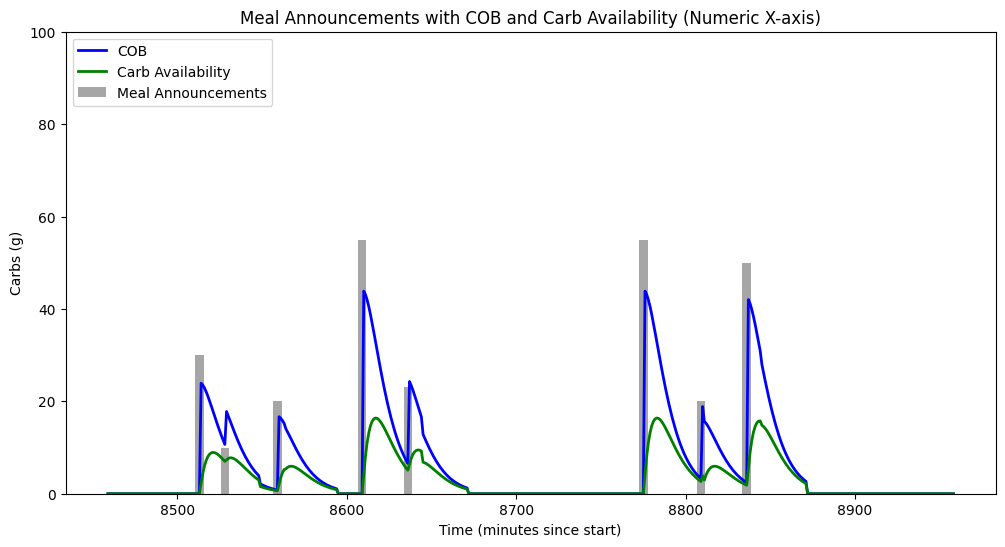

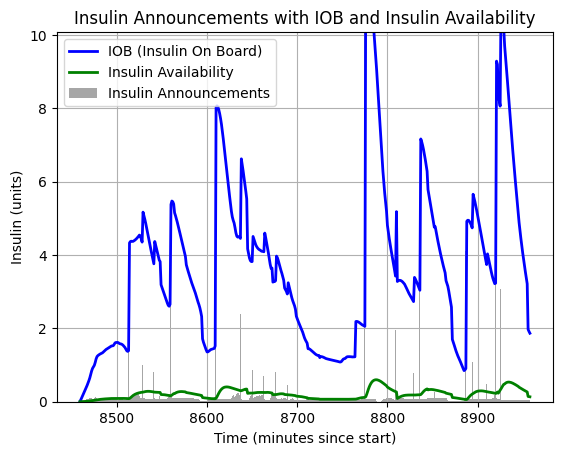

In [9]:
import matplotlib.pyplot as plt

# Select a subset of data (first 500 rows) for visualization
example_patient_subset = example_patient_df.iloc[:500]

x_index = example_patient_subset.index  # Use the time index

plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))

# Plot the meal announcements as a bar chart.
plt.bar(
    x_index,
    example_patient_subset["carbs-0:00"],
    width=5,  # Each bar spans 5 minutes
    color="gray",
    alpha=0.7,
    label="Meal Announcements",
)

# Overlay the COB (Carbs on Board) curve.
plt.plot(x_index, example_patient_subset["cob"], label="COB", color="blue", linewidth=2)

# Overlay the carb availability curve.
plt.plot(
    x_index,
    example_patient_subset["carb_availability"],
    label="Carb Availability",
    color="green",
    linewidth=2,
)

plt.ylim(0, 100)
plt.xlabel("Time (minutes since start)")
plt.ylabel("Carbs (g)")
plt.title("Meal Announcements with COB and Carb Availability (Numeric X-axis)")
plt.legend()
plt.show()

# Plot the insulin announcements as a bar chart
plt.bar(
    x_index,
    example_patient_subset["insulin-0:00"],
    width=1,  # Each bar spans 5 minutes
    color="gray",
    alpha=0.7,
    label="Insulin Announcements",
)

# Overlay the Insulin On Board (IOB) curve
plt.plot(
    x_index,
    example_patient_subset["iob"],
    label="IOB (Insulin On Board)",
    color="blue",
    linewidth=2,
)

# Overlay the Insulin Availability curve
plt.plot(
    x_index,
    example_patient_subset["insulin_availability"],
    label="Insulin Availability",
    color="green",
    linewidth=2,
)

# Formatting
plt.ylim(
    0, max(example_patient_subset["insulin-0:00"].max(), 3)
)  # Adjust Y-axis dynamically
plt.xlabel("Time (minutes since start)")
plt.ylabel("Insulin (units)")
plt.title("Insulin Announcements with IOB and Insulin Availability")
plt.legend()
plt.grid(True)
plt.show()

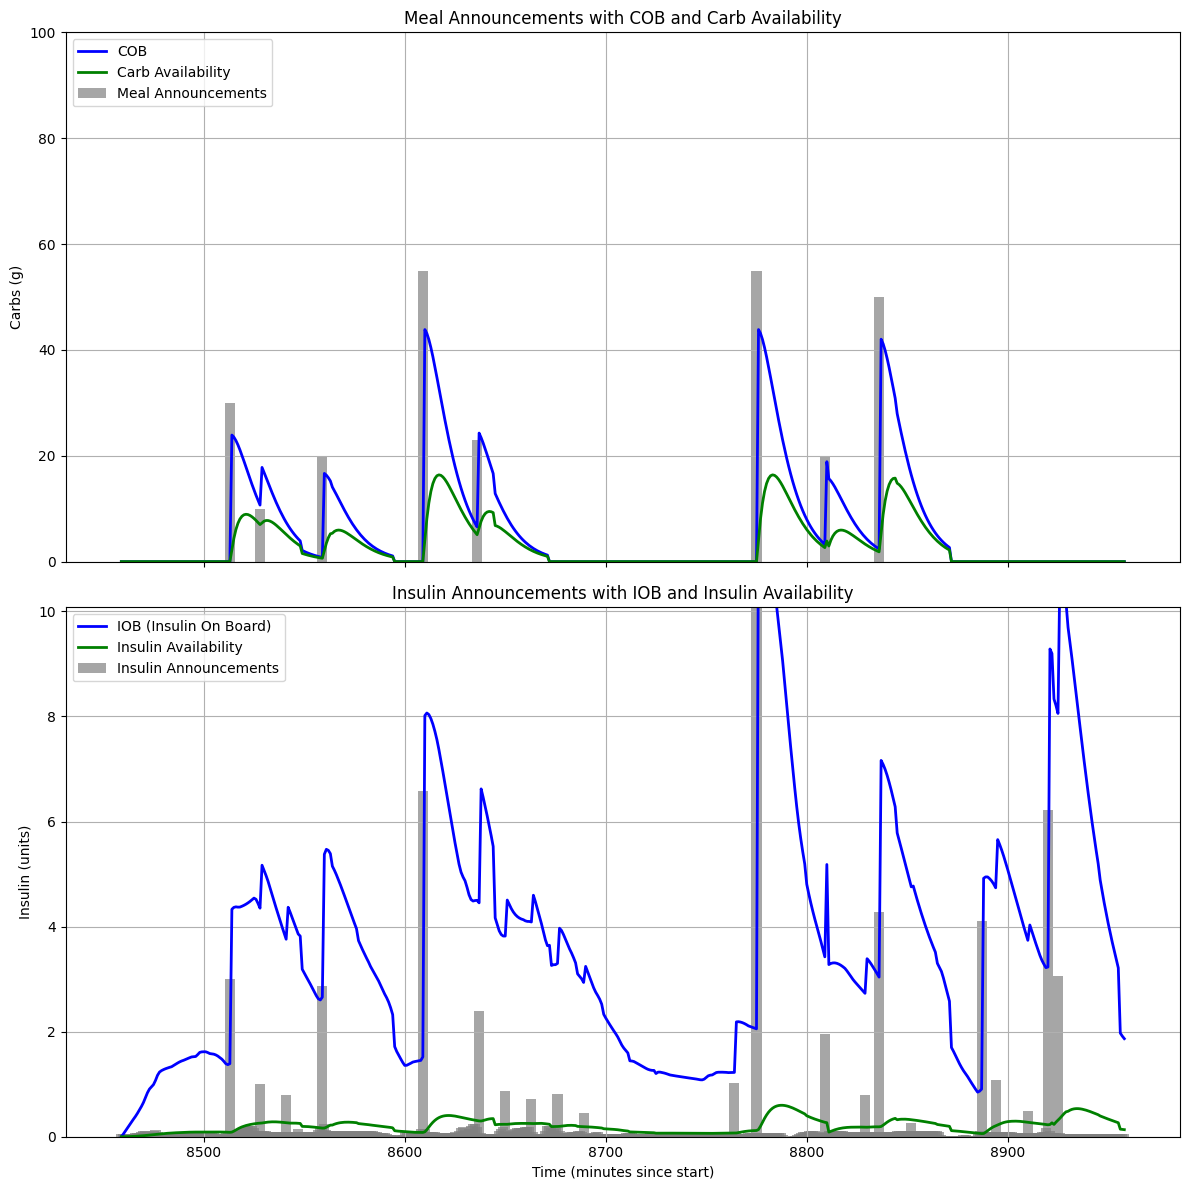

In [10]:
import matplotlib.pyplot as plt

# Select a subset of data (first 500 rows) for visualization
example_patient_subset = example_patient_df.iloc[:500]
x_index = example_patient_subset.index  # Use the time index

# Create two vertically stacked plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

# -----------------------------------------------------------------
# 🔹 First Plot: Meal Announcements, COB, and Carb Availability
# -----------------------------------------------------------------
axes[0].bar(
    x_index,
    example_patient_subset["carbs-0:00"],
    width=5,
    color="gray",
    alpha=0.7,
    label="Meal Announcements",
)

axes[0].plot(
    x_index, example_patient_subset["cob"], label="COB", color="blue", linewidth=2
)
axes[0].plot(
    x_index,
    example_patient_subset["carb_availability"],
    label="Carb Availability",
    color="green",
    linewidth=2,
)

axes[0].set_ylim(0, 100)
axes[0].set_ylabel("Carbs (g)")
axes[0].set_title("Meal Announcements with COB and Carb Availability")
axes[0].legend()
axes[0].grid(True)

# -----------------------------------------------------------------
# 🔹 Second Plot: Insulin Announcements, IOB, and Insulin Availability
# -----------------------------------------------------------------
axes[1].bar(
    x_index,
    example_patient_subset["insulin-0:00"],
    width=5,
    color="gray",
    alpha=0.7,
    label="Insulin Announcements",
)

axes[1].plot(
    x_index,
    example_patient_subset["iob"],
    label="IOB (Insulin On Board)",
    color="blue",
    linewidth=2,
)
axes[1].plot(
    x_index,
    example_patient_subset["insulin_availability"],
    label="Insulin Availability",
    color="green",
    linewidth=2,
)

axes[1].set_ylim(0, max(example_patient_subset["insulin-0:00"].max(), 3))
axes[1].set_xlabel("Time (minutes since start)")
axes[1].set_ylabel("Insulin (units)")
axes[1].set_title("Insulin Announcements with IOB and Insulin Availability")
axes[1].legend()
axes[1].grid(True)

# -----------------------------------------------------------------
# 🔹 Display Both Plots
# -----------------------------------------------------------------
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()